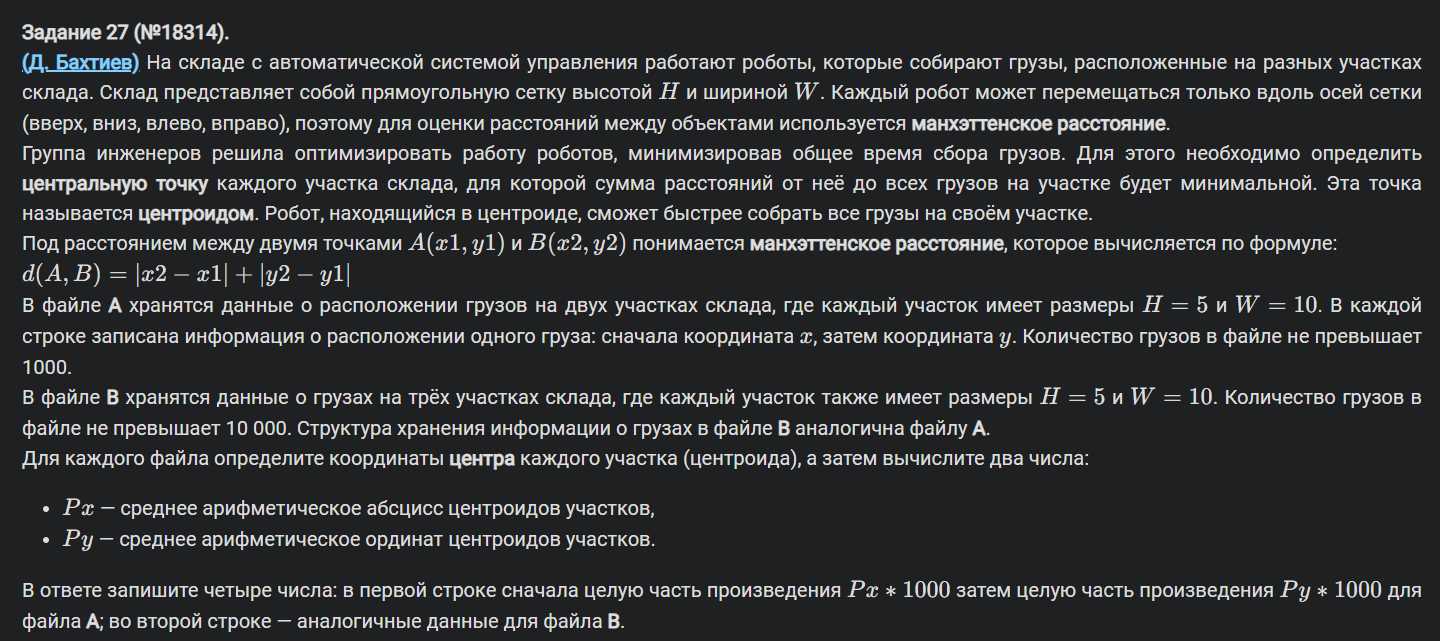

In [2]:
data = [[float(x) for x in line.replace(',','.').split()] for line in open('27_B_18314.txt')]
clusters = [[], [], []]

for x, y in data:
    if x < -10:
        clusters[0].append((x,y))
    elif -10 < x < 18:
        clusters[1].append((x,y))
    else:
        clusters[2].append((x,y))

def dist(p1, p2):
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

centroids = []
for cluster in clusters:
    centroid = None
    min_dist = 10**10
    for point in cluster:
        new_dist = sum(dist(point, other_point) for other_point in cluster)
        if new_dist < min_dist:
            min_dist = new_dist
            centroid = point
    centroids.append(centroid)
Px = sum(x for x, y in centroids) / len(centroids)
Py = sum(y for x, y in centroids) / len(centroids)
print(int(Px * 1000), int(Py * 1000))

3078 -4758


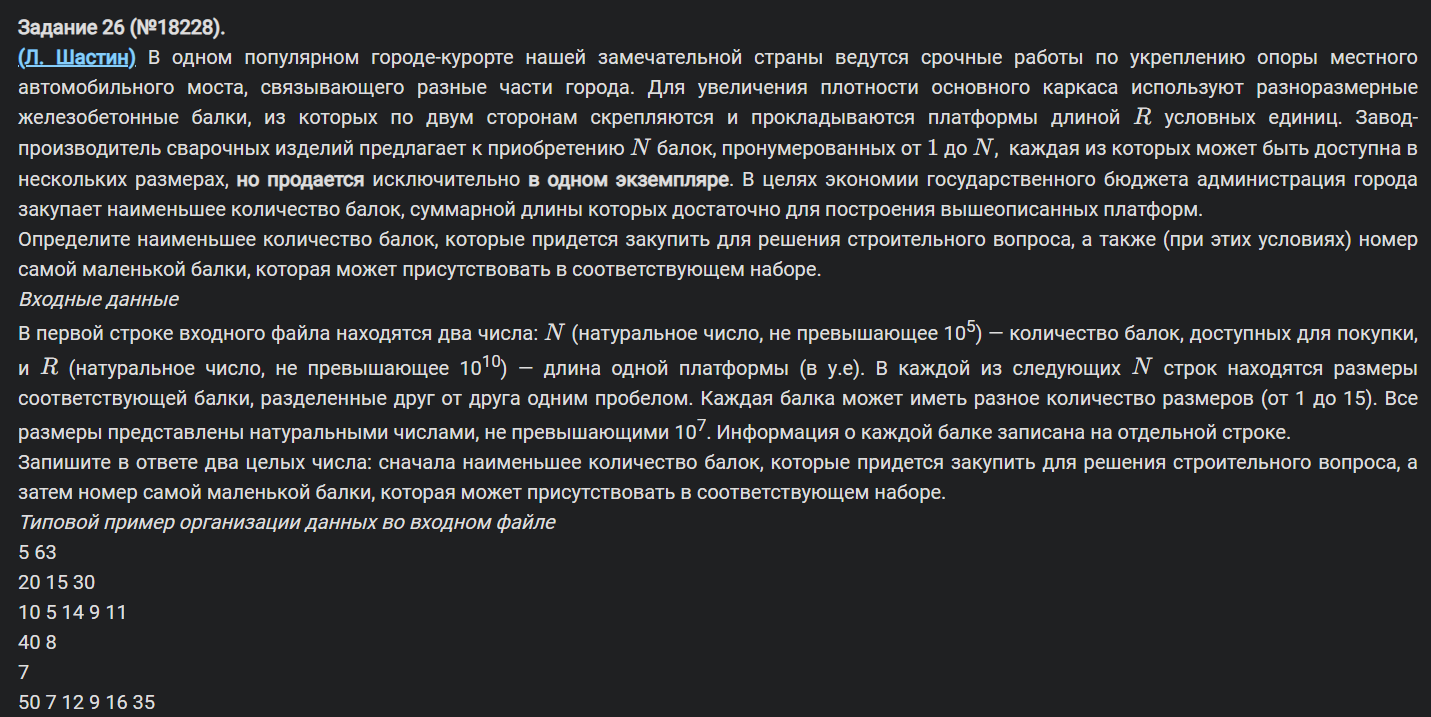

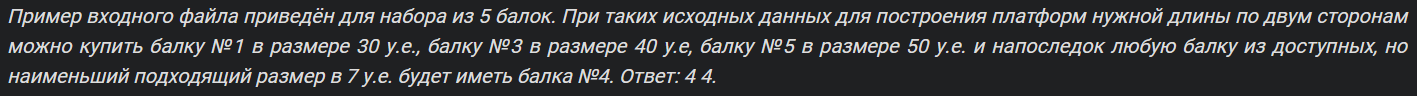

9462, 2898 

In [3]:
with open('26_18228.txt') as fin:
    N, R = map(int, fin.readline().split())
    bars = [sorted(map(int, line.split()), reverse=True) + [id] for id, line in enumerate(fin.readlines(), start=1)]
    bars.sort(reverse=True)

In [43]:
summ = 0
balk = []
for line in bars:
    for i in line[:-1]:
        if summ + i <= R * 2:
            summ += i
            balk.append((i, line[-1]))
            break
len(balk), min(balk, key=lambda x: x[0])[1]

(9465, 3130)

In [4]:
bought = []
for line in bars:
    if sum(bought) >= R * 2:
        break
    bought.append(line[0])
minn = bought.pop()
for line in reversed(bars):
    if sum(bought) + line[0] >= R * 2:
        minn = line
        break
len(bought) + 1, minn[-1]

(9462, 2898)

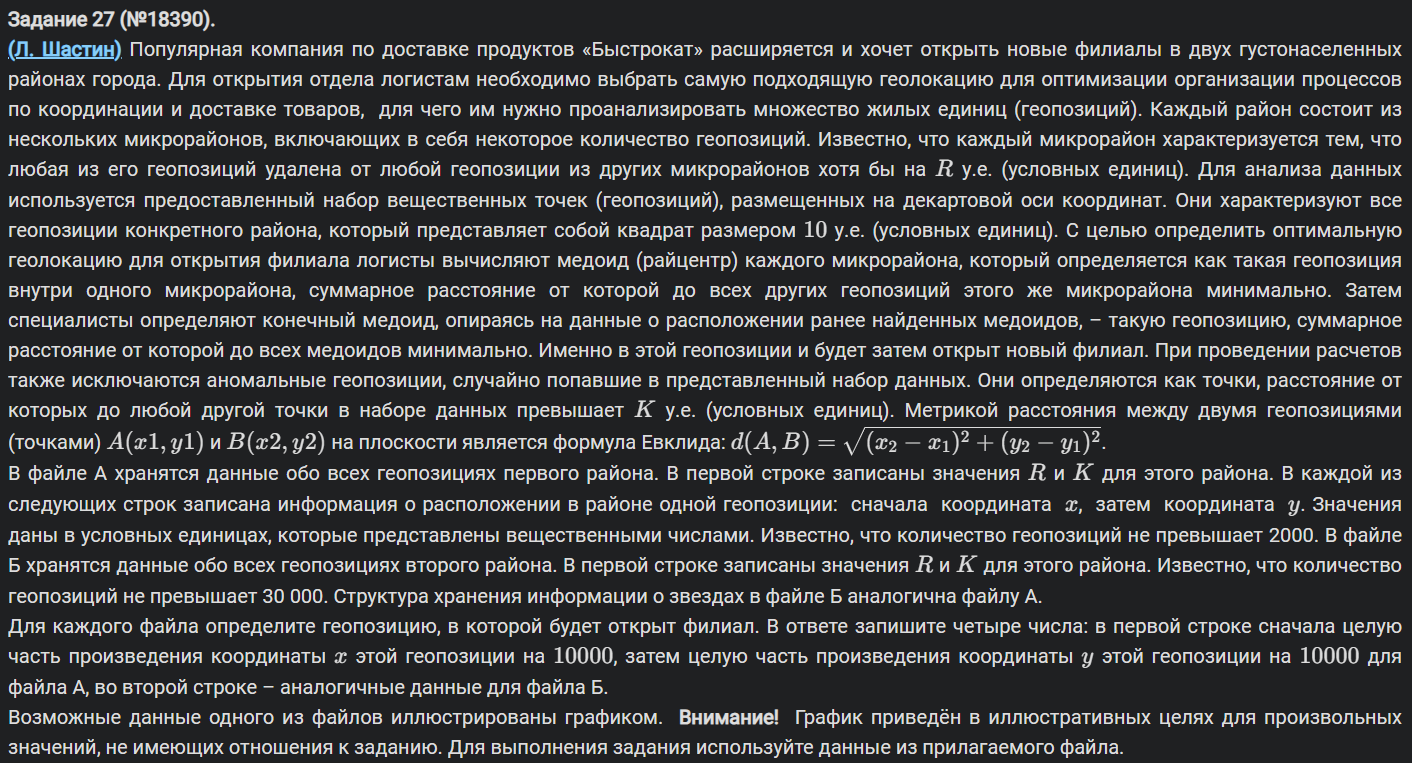

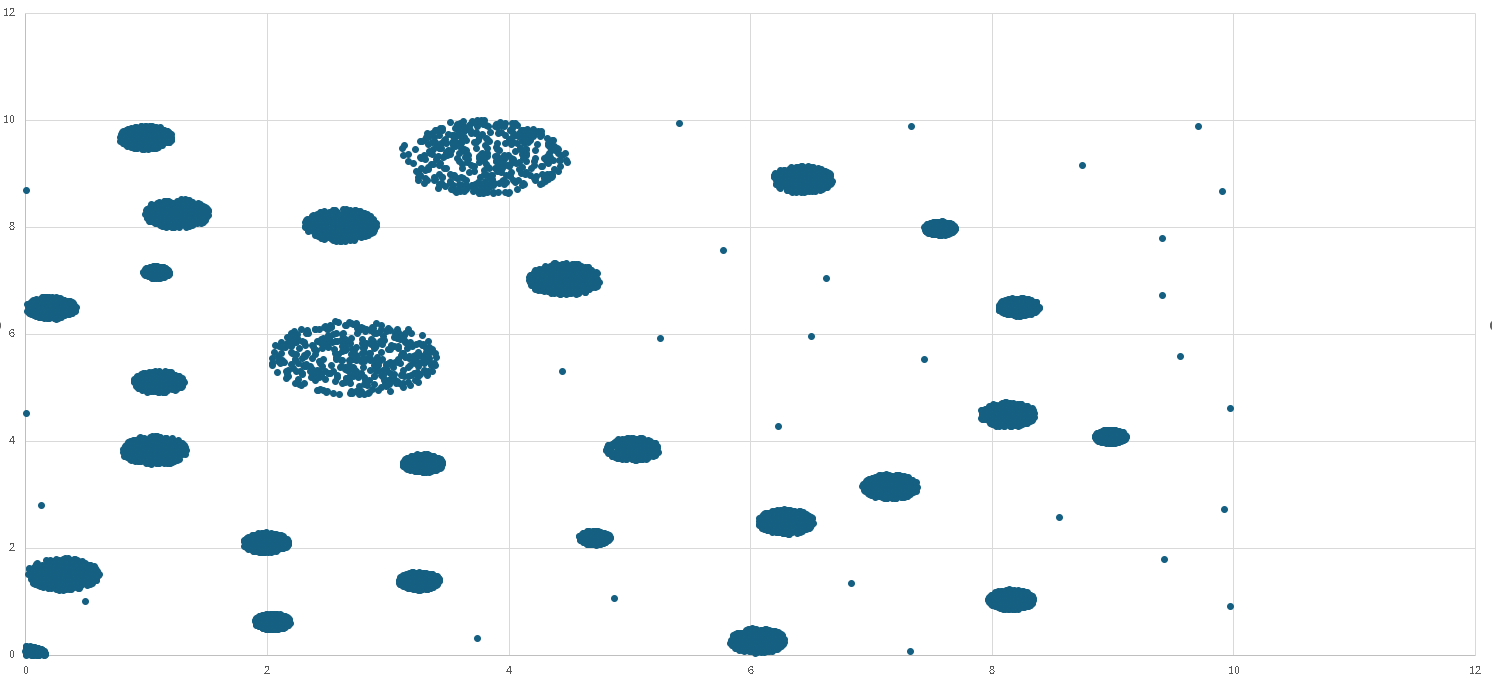

In [6]:
from math import dist
data = [list(map(float, (x.replace(',','.') for x in line.split()))) for line in open('27_B_18390.txt')]
clusters = []
r = 0.7
while data:
    clusters.append([data.pop()])
    for p1 in clusters[-1]:
        neigbours = [p for p in data if dist(p1, p) < r]
        clusters[-1].extend(neigbours)
        for p in neigbours:
            data.remove(p)


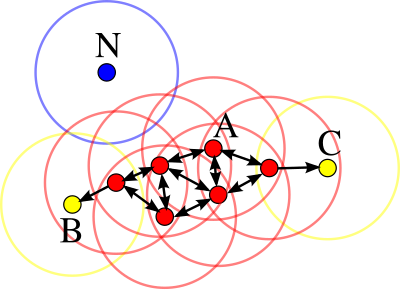

In [7]:
from plotly import express as px
import pandas as pd

df = pd.concat([pd.DataFrame(item, columns=['x', 'y']).assign(cluster=id) for id, item in enumerate(clusters)])
px.scatter(df, x='x', y='y', color='cluster', width=900)